## Image

In [ ]:
# Importing libraries

import cv2
import numpy as np
from matplotlib import pyplot as plt

In [ ]:
# Gray Scale Image

img = cv2.imread('1.jpeg',0)
cv2.imshow('image',img)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [ ]:
# Colored Image

img = cv2.imread('1.jpeg',1)
cv2.imshow('image',img)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [ ]:
# Unchanged color Image

img = cv2.imread('1.jpeg',-1)
cv2.imshow('image',img)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [ ]:
# Making a copy of image

img = cv2.imread('1.jpeg',-1)
cv2.imshow('image',img)
cv2.waitKey(0)
cv2.destroyAllWindows()

cv2.imwrite('1_copy.png',img)

In [ ]:
# draw green text on the image

output = cv2.imread('1.jpeg')
cv2.putText(output, "What a scenary", (10, 25), 
    cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 255, 0), 2)
cv2.imshow("Text", output)
cv2.waitKey(0)

## Video

In [ ]:
cap = cv2.VideoCapture(0)

while(True):
    # Capture frame-by-frame
    ret, frame = cap.read()

    # Our operations on the frame come here
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    # Display the resulting frame
    cv2.imshow('frame',gray)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# When everything done, release the capture
cap.release()
cv2.destroyAllWindows()

In [ ]:

import cv2

cap = cv2.VideoCapture(0)
fourcc = cv2.VideoWriter_fourcc(*'XVID')
out = cv2.VideoWriter('output.avi', fourcc, 20.0, (640,480))

print(cap.isOpened())
while(cap.isOpened()):
    ret, frame = cap.read()
    if ret == True:
        print(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
        print(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))

        out.write(frame)

        gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        cv2.imshow('frame', gray)

        if cv2.waitKey(1) & 0xFF == ord('q'):
            break
    else:
        break

cap.release()
out.release()
cv2.destroyAllWindows()

## Contour Detection

In [27]:
#Importing the libraries
import imutils
import cv2
import matplotlib.pyplot as plt
import numpy as np

# read the image
image = cv2.imread("Images/3.jpg")

In [28]:
# Rescaling the image

RESCALED_HEIGHT = 500
ratio = image.shape[0] / (RESCALED_HEIGHT)

rescaled_image = imutils.resize(image, height = int(RESCALED_HEIGHT))

In [29]:
# convert to RGB
#image = cv2.cvtColor(rescaled_image, cv2.COLOR_BGR2RGB)

# convert to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

gray = cv2.medianBlur(gray,5)
gray = cv2.GaussianBlur(gray,(5,5),0)
gray = cv2.bilateralFilter(gray,8,135,135)

edges = cv2.Canny(gray,100,25)

In [30]:
# Gamma adjustment

def adjust_gamma(image, gamma=1.2):
    
    # build a lookup table mapping the pixel values [0, 255] to
    # their adjusted gamma values
    invGamma = 1.0 / gamma
    table = np.array([((i / 255.0) ** invGamma) * 255
        for i in np.arange(0, 256)]).astype("uint8")
    # apply gamma correction using the lookup table
    return cv2.LUT(image, table)

gray = adjust_gamma(edges)

In [31]:
# Dilation of image

kernel = cv2.getStructuringElement(cv2.MORPH_RECT,(15,15))
dilation = cv2.dilate(gray,kernel,iterations = 1)

In [32]:
# Applying adaptive threshold to the image

th2 = cv2.adaptiveThreshold(dilation,150,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,\
            cv2.THRESH_BINARY,11,8)

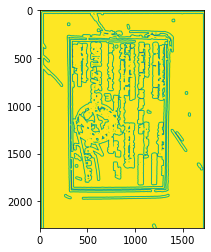

In [33]:
# show the image with the drawn contours

plt.imshow(th2)
plt.show()

In [34]:
# find the contours from the thresholded image
contours, hierarchy = cv2.findContours(th2, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)

# draw all contours
image = cv2.drawContours(image, contours, -1, (0, 255, 0), 2)

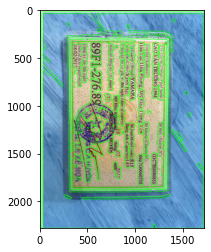

In [35]:
# show the image with the drawn contours
plt.imshow(image)
plt.show()

In [36]:
plt.imsave('dilation.jpg',image)

## Method 2

In [37]:
#Importing the libraries
import imutils
import cv2
import matplotlib.pyplot as plt
import numpy as np

# read the image
image = cv2.imread("Images/0.jpg")

In [38]:
grayImage = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
# blur the image to remove high frequency noise 
# it helps in finding/detecting contour in gray image
grayImageBlur = cv2.blur(grayImage,(3,3))
# then we performed canny edge detection
edgedImage = cv2.Canny(grayImageBlur, 100, 300, 3)

In [39]:
cv2.imshow("Edge Detected Image", edgedImage)
cv2.waitKey(0) # press 0 to close all cv2 windows
cv2.destroyAllWindows()

In [40]:
allContours = cv2.findContours(edgedImage.copy(), cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)
allContours = imutils.grab_contours(allContours)
# descending sort contours area and keep top 1
allContours = sorted(allContours, key=cv2.contourArea, reverse=True)[:1]
# approximate the contour
perimeter = cv2.arcLength(allContours[0], True) 
ROIdimensions = cv2.approxPolyDP(allContours[0], 0.02*perimeter, True)
# show the contour on image
cv2.drawContours(image, [ROIdimensions], -1, (0,255,0), 2)

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]

In [41]:
ROIdimensions.shape

(12, 1, 2)

In [42]:
# reshape coordinates array
ROIdimensions = ROIdimensions.reshape(4,2)

# list to hold ROI coordinates
rect = np.zeros((4,2), dtype="float32")

# top left corner will have the smallest sum, 
# bottom right corner will have the largest sum
s = np.sum(ROIdimensions, axis=1)
rect[0] = ROIdimensions[np.argmin(s)]
rect[2] = ROIdimensions[np.argmax(s)]

# top-right will have smallest difference
# botton left will have largest difference
diff = np.diff(ROIdimensions, axis=1)
rect[1] = ROIdimensions[np.argmin(diff)]
rect[3] = ROIdimensions[np.argmax(diff)]

# top-left, top-right, bottom-right, bottom-left
(tl, tr, br, bl) = rect

# compute width of ROI
widthA = np.sqrt((tl[0] - tr[0])**2 + (tl[1] - tr[1])**2)
widthB = np.sqrt((bl[0] - br[0])**2 + (bl[1] - br[1])**2)
maxWidth = max(int(widthA), int(widthB))

# compute height of ROI
heightA = np.sqrt((tl[0] - bl[0])**2 + (tl[1] - bl[1])**2 )
heightB = np.sqrt((tr[0] - br[0])**2 + (tr[1] - br[1])**2 )
maxHeight = max(int(heightA), int(heightB))

ValueError: cannot reshape array of size 24 into shape (4,2)

## PDF2IMAGE

In [ ]:
import os
import time
files = os.listdir('pdfs')
import os.path
from os import path

In [ ]:
import pdf2image
from PIL import Image
import time

#DECLARE CONSTANTS
DPI = 200
OUTPUT_FOLDER = None
FIRST_PAGE = None
LAST_PAGE = None
FORMAT = 'jpg'
THREAD_COUNT = 1
USERPWD = None
USE_CROPBOX = False
STRICT = False

def pdftopil():
    #This method reads a pdf and converts it into a sequence of images
    #PDF_PATH sets the path to the PDF file
    #dpi parameter assists in adjusting the resolution of the image
    #output_folder parameter sets the path to the folder to which the PIL images can be stored (optional)
    #first_page parameter allows you to set a first page to be processed by pdftoppm 
    #last_page parameter allows you to set a last page to be processed by pdftoppm
    #fmt parameter allows to set the format of pdftoppm conversion (PpmImageFile, TIFF)
    #thread_count parameter allows you to set how many thread will be used for conversion.
    #userpw parameter allows you to set a password to unlock the converted PDF
    #use_cropbox parameter allows you to use the crop box instead of the media box when converting
    #strict parameter allows you to catch pdftoppm syntax error with a custom type PDFSyntaxError

    pil_images = pdf2image.convert_from_path(PDF_PATH, dpi=DPI, output_folder=OUTPUT_FOLDER, first_page=FIRST_PAGE, last_page=LAST_PAGE, fmt=FORMAT, thread_count=THREAD_COUNT, userpw=USERPWD, use_cropbox=USE_CROPBOX, strict=STRICT)
    return pil_images
    
def save_images(pil_images):
    index1 = 0
    #This method helps in converting the images in PIL Image file format to the required image format
    for image in pil_images:
        image.save("page_" + str(index1) + ".jpg")
        index1 += 1

In [ ]:
for f in files:
    PDF_PATH = "pdfs/"+f
    pil_images = pdftopil()
    save_images(pil_images)
    time.sleep(6)